In [202]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [229]:
import numpy as np
import pandas as pd
from hf import compute_all_integrals, hartree_fock
from utils import load_basis_set
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
basis_set = load_basis_set('basis_sets/STO-3G.txt')

In [64]:
#################
###### CH4 ######
#################
Rs = np.array([
        [-0.000000000000,   0.000000000000,   0.000000000000],
        [1.183771681898,  -1.183771681898,  -1.183771681898],
        [1.183771681898,   1.183771681898,   1.183771681898],
        [-1.183771681898,   1.183771681898,  -1.183771681898],
        [-1.183771681898,  -1.183771681898,   1.183771681898]
])
atoms = np.array(['C', 'H', 'H', 'H', 'H'])
Zs = np.array([6, 1, 1, 1, 1])

In [239]:
#################
###### H2O ######
#################
Rs = np.array([
        [0.000000000000,  -0.143225816552,   0.000000000000],
        [1.638036840407,   1.136548822547,  -0.000000000000],
        [-1.638036840407,   1.136548822547,  -0.000000000000]
    ])
atoms = np.array(['O', 'H', 'H'])
Zs = np.array([8, 1, 1])

In [25]:
#################
###### N2 #######
#################
Rs = np.array([
        [0, 0, 0],
        [0, 0, 2.074]
    ])
atoms = np.array(['N', 'N'])
Zs = np.array([7, 7])

In [29]:
#################
###### CO #######
#################
Rs = np.array([
        [0, 0, 0],
        [0, 0, 2.132]
    ])
atoms = np.array(['C', 'O'])
Zs = np.array([6, 8])

In [193]:
#################
###### FH #######
#################
Rs = np.array([
        [0, 0, 0],
        [0, 0, 1.807]
    ])
atoms = np.array(['F', 'H'])
Zs = np.array([9, 1])

In [184]:
#################
###### H #######
#################
Rs = np.array([
        [0, 0, 0]
    ])
atoms = np.array(['F'])
Zs = np.array([9])

In [195]:
n_nuclei = atoms.shape[0]

ao_types = [basis_set[a]['orbital_types'] for a in atoms]
ao_exps = [basis_set[a]['expos'] for a in atoms]
ao_coefs = [basis_set[a]['coefs'] for a in atoms]

orbital_counts = [len(at) for at in ao_types]
ao_types = np.hstack(ao_types)
ao_exps = np.vstack(ao_exps)
ao_coefs = np.vstack(ao_coefs)
ao2nuc = np.repeat(np.arange(n_nuclei), orbital_counts, axis=0)
n_orbitals = ao2nuc.shape[0]

vals = hartree_fock(Zs.sum(), ao_exps, ao_coefs, ao_types, Rs, Zs, ao2nuc, verbose=True)

************************ Hartree-Fock Algorithm ************************
num ele: 10 | num orb:  6 | nuc energy: 4.981
int time: 2.62 sec
iter: #  0 | ele energy: -102.80433886 | tot mol energy: -97.82370798
iter: #  1 | ele energy: -103.54149928 | tot mol energy: -98.56086840
iter: #  2 | ele energy: -103.55335458 | tot mol energy: -98.57272370
iter: #  3 | ele energy: -103.55347425 | tot mol energy: -98.57284337
iter: #  4 | ele energy: -103.55347733 | tot mol energy: -98.57284645
iter: #  5 | ele energy: -103.55347747 | tot mol energy: -98.57284659
iter: #  6 | ele energy: -103.55347748 | tot mol energy: -98.57284660
iter: #  7 | ele energy: -103.55347748 | tot mol energy: -98.57284660
iter: #  8 | ele energy: -103.55347748 | tot mol energy: -98.57284660
iter: #  9 | ele energy: -103.55347748 | tot mol energy: -98.57284660
iter: # 10 | ele energy: -103.55347748 | tot mol energy: -98.57284660
iter: # 11 | ele energy: -103.55347748 | tot mol energy: -98.57284660
iter: # 12 | ele energ

In [242]:
energies = []
atoms = np.array(['N', 'N'])
n_nuclei = atoms.size
Zs = np.array([7, 7])
ao_types = [basis_set[a]['orbital_types'] for a in atoms]
ao_exps = [basis_set[a]['expos'] for a in atoms]
ao_coefs = [basis_set[a]['coefs'] for a in atoms]

orbital_counts = [len(at) for at in ao_types]
ao_types = np.hstack(ao_types)
ao_exps = np.vstack(ao_exps)
ao_coefs = np.vstack(ao_coefs)
ao2nuc = np.repeat(np.arange(n_nuclei), orbital_counts, axis=0)
n_orbitals = ao2nuc.shape[0]

length_grid = np.linspace(1.5, 3.0, 51)

for length in length_grid:
    Rs = np.array([
            [0, 0, 0],
            [0, 0, length]
        ])
    vals = hartree_fock(Zs.sum(), ao_exps, ao_coefs, ao_types, Rs, Zs, ao2nuc)
    energies.append(vals[0])
    print(length)
    

1.5
1.53
1.56
1.59
1.62
1.65
1.68
1.71
1.74
1.77
1.8
1.83
1.8599999999999999
1.8900000000000001
1.92
1.95
1.98
2.01
2.04
2.07
2.1
2.13
2.16
2.19
2.2199999999999998
2.25
2.2800000000000002
2.31
2.34
2.37
2.4
2.4299999999999997
2.46
2.49
2.52
2.55
2.58
2.61
2.6399999999999997
2.67
2.7
2.73
2.76
2.79
2.82
2.8499999999999996
2.88
2.91
2.94
2.9699999999999998
3.0


In [230]:
plt.style.use('seaborn-poster')

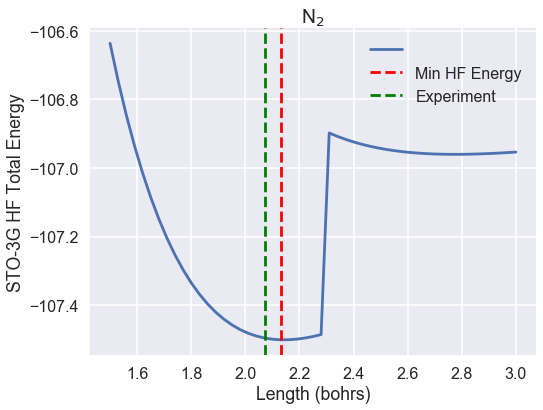

In [248]:
plt.figure(figsize=(8, 6))
plt.plot(length_grid, energies)
plt.axvline(length_grid[np.argmin(energies)], c='r', ls='--')
plt.axvline(2.074, c='g', ls='--')
plt.legend(['', 'Min HF Energy', 'Experiment'])
plt.xlabel('Length (bohrs)')
plt.ylabel('STO-3G HF Total Energy')
plt.title('N$_2$')

In [189]:
vals[1]

array([-24.70649102,  -0.59974467,   0.37319027,   0.37319027,
         0.37319027])

In [190]:
vals[0] - vals[1][10 // 2 - 1]

-97.98650495873598

In [ ]:
vals

In [69]:
kpm_in_ha = 627.509

In [73]:
(-37.08958664 - 2 - (-39.72685031635886))

0.637263676358863

In [75]:
import pickle 
def read_pickle(filename):
    return pickle.load(open(filename, 'rb'))

In [168]:
out_dict = read_pickle('hf_output2.p')

In [173]:
[out_dict[i][0][-1] for i in range(43, 59)]

['converged',
 'converged',
 'converged',
 'converged',
 'converged',
 'converged',
 'converged',
 'converged',
 'converged',
 'converged',
 'converged',
 'diverged',
 'converged',
 'converged',
 'converged',
 'converged']

In [164]:
df.iloc[49]

Rs            [[0.98091743, -0.1292835, 0.05179981], [2.3771...
ae_pbe0                                                -969.847
atoms                            [C, O, C, C, H, H, H, H, H, H]
e1_zindo                                                6.41342
ea_zindo                                               -0.79841
emax_zindo                                              6.41342
homo_gw                                                 -8.8279
homo_pbe0                                               -6.5784
homo_zindo                                                -9.42
imax_zindo                                             0.392773
ip_zindo                                                9.00595
lumo_gw                                                  0.9931
lumo_pbe0                                                0.0821
lumo_zindo                                                1.254
n_nuclei                                                     10
p_pbe0                                  

In [165]:
df.iloc[49]

Rs            [[0.98091743, -0.1292835, 0.05179981], [2.3771...
ae_pbe0                                                -969.847
atoms                            [C, O, C, C, H, H, H, H, H, H]
e1_zindo                                                6.41342
ea_zindo                                               -0.79841
emax_zindo                                              6.41342
homo_gw                                                 -8.8279
homo_pbe0                                               -6.5784
homo_zindo                                                -9.42
imax_zindo                                             0.392773
ip_zindo                                                9.00595
lumo_gw                                                  0.9931
lumo_pbe0                                                0.0821
lumo_zindo                                                1.254
n_nuclei                                                     10
p_pbe0                                  